# Memory needs on GPU devices for different AmgX solvers

### Description 
Several AmgX multigrid solvers are tested.


In [5]:
from trustutils import run  
run.TRUST_parameters()
run.introduction('Pierre LEDAC')
meshes=["16x16x16","11x11x11","6x6x6"]
cases=[("amgx_gc_c-amg","AmgX CG/C-AMG"),("amgx_gc_sa-amg","AmgX CG/SA-AMG"),("tuned_amgx_gc_c-amg","Tuned AmgX CG/C-AMG")]
for mesh in meshes:
    for case,label in cases:
        run.addCase(mesh ,"%s.data" % case, 2)
run.printCases()

### TRUST parameters 
 * Version TRUST: 1.8.5_beta
 * Binary used: /export/home/pl254994/trust/amgx/exec/TRUST_mpi_opt (built on TRUST /export/home/pl254994/trust/amgx/Validation/Rapports_automatiques/Verification/Solveurs/GPU/AmgX_Memoire/build)

## Introduction 
 Validation made by : Pierre LEDAC



 Report generated 22/04/2022

Usage: make_PAR.data datafile [NB_CPUs]
Wait for partitionning...End.
To run the parallel calculation on 2 CPUs:
trust PAR_amgx_gc_c-amg 2
Usage: make_PAR.data datafile [NB_CPUs]
Wait for partitionning...End.
To run the parallel calculation on 2 CPUs:
trust PAR_amgx_gc_c-amg 2
Usage: make_PAR.data datafile [NB_CPUs]
Wait for partitionning...End.
To run the parallel calculation on 2 CPUs:
trust PAR_amgx_gc_c-amg 2
Usage: make_PAR.data datafile [NB_CPUs]
Wait for partitionning...End.
To run the parallel calculation on 2 CPUs:
trust PAR_amgx_gc_sa-amg 2
Usage: make_PAR.data datafile [NB_CPUs]
Wait for partitionning...End.
To run the parallel calculation on 2 CPUs:
trust PAR_amgx_gc_sa-amg 2
Usage: make_PAR.data datafile [NB_CPUs]
Wait for partitionning...End.
To run the parallel calculation on 2 CPUs:
trust PAR_amgx_gc_sa-amg 2
Usage: make_PAR.data datafile [NB_CPUs]
Wait for partitionning...End.
To run the parallel calculation on 2 CPUs:
trust PAR_tuned_amgx_gc_c-amg 2
Usage: make_PAR.da

### Test cases 
* 16x16x16/amgx_gc_c-amg.data : 
* 16x16x16/amgx_gc_sa-amg.data : 
* 16x16x16/tuned_amgx_gc_c-amg.data : 
* 11x11x11/amgx_gc_c-amg.data : 
* 11x11x11/amgx_gc_sa-amg.data : 
* 11x11x11/tuned_amgx_gc_c-amg.data : 
* 6x6x6/amgx_gc_c-amg.data : 
* 6x6x6/amgx_gc_sa-amg.data : 
* 6x6x6/tuned_amgx_gc_c-amg.data : 


In [2]:
run.runCases()

Running ...
./post_run
./post_run
./post_run
./post_run
./post_run
./post_run
./post_run
./post_run
./post_run
  => A total of 9 cases were (successfully) run in 30.6s.


# Solver convergence on different meshes

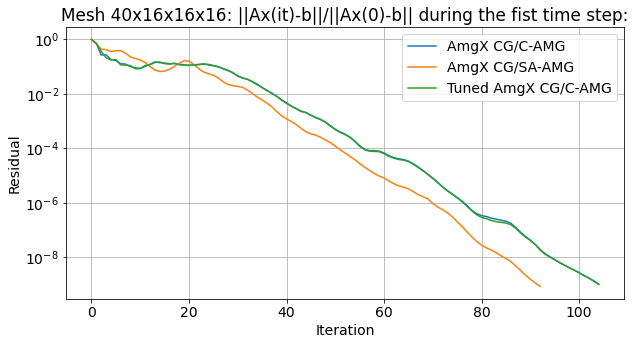

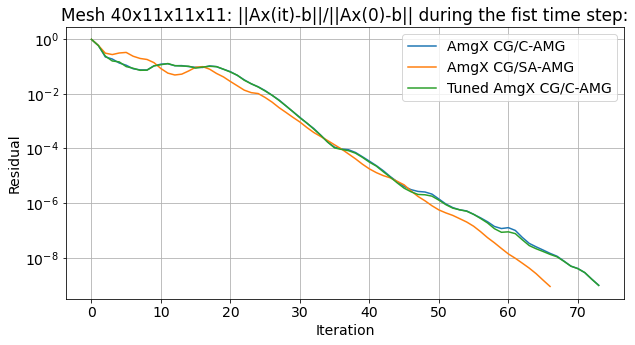

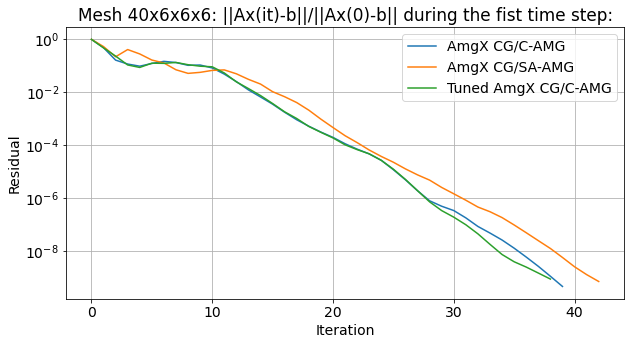

In [7]:
from trustutils import plot
    
for mesh in meshes:
    a = plot.Graph("Mesh 40x"+mesh+": ||Ax(it)-b||/||Ax(0)-b|| during the fist time step:","",1,1,[10,5])
    for case,label in cases:
        cols = plot.loadText(mesh+"/%s.res" % case)
        a.add(cols[0],cols[1],label="%s" % label)
    a.label("Iteration","Residual")
    a.subplot.set_yscale('log')

# Memory needed on GPU

In [52]:
headers=["Setup[GB]","Solve[GB]"]
for mesh in ["6x6x6"]:
    print("Mesh 40x"+mesh+":")
    a = plot.Table(headers)
    for case,label in cases:
        a.load(mesh+"/%s.mem" % case,"%s" % label)
        print(a)
a.print()
meshes=["11x11x11"]
for mesh in meshes:
    print("Mesh 40x"+mesh+":")
    b = plot.Table(headers)
    for case,label in cases:
        b.load(mesh+"/%s.mem" % case,"%s" % label)
print(b)

Mesh 40x6x6x6:
Mesh 40x11x11x11:


# Time needed on GPU

In [16]:
headers=["Copy[s]","Solve[s]"]
for mesh in meshes:
    print("Mesh 40x"+mesh+":")
    a = plot.Table(headers)
    for case,label in cases:
        a.load(mesh+"/%s.cpu" % case,"%s" % label)
    a.print()

Mesh 40x16x16x16:
Mesh 40x11x11x11:
Mesh 40x6x6x6:


# Conclusions
Classical multigrid (C-AMG) generally offer faster convergence but at a higher memory cost. Switch to SA-AMG preconditioner in case of memory issues.


### Computer performance:

In [9]:
run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cells
10x10x10/amgx_gc,is242981.intra.cea.fr,Linux,87.4216,0.558615,29160-29160
10x10x10/amgx_gc_gs,is242981.intra.cea.fr,Linux,174.1660,1.11822,29160-29160
10x10x10/amgx_fgmres_gs,is242981.intra.cea.fr,Linux,148.5320,0.952869,29160-29160
10x10x10/petsc_gc,is242981.intra.cea.fr,Linux,43.9423,0.278088,29160-29160
10x10x10/petsc_gc_ssor,is242981.intra.cea.fr,Linux,46.0014,0.293284,29160-29160
Total,,,500.0633,,
